In [1]:
import pandas as pd
data=pd.read_csv(r"C:\Users\devad\Downloads\akirapr\Bangalore_AQI_Dataset (1).csv")
data

,City,Date,AQI,PM2.5,PM10,NO2,SO2,CO,O3
0,Bangalore,01/01/18,68,37.40,73.44,56.44,77.52,0.71,64.60
1,Bangalore,02/01/18,76,41.80,82.08,63.08,86.64,0.80,72.20
2,Bangalore,03/01/18,70,38.50,75.60,58.10,79.80,0.74,66.50
3,Bangalore,04/01/18,78,42.90,84.24,64.74,88.92,0.82,74.10
4,Bangalore,05/01/18,82,45.10,88.56,68.06,93.48,0.86,77.90
...,...,...,...,...,...,...,...,...,...
2551,Bangalore,27/12/24,54,29.70,58.32,44.82,61.56,0.57,51.30
2552,Bangalore,28/12/24,57,31.35,61.56,47.31,64.98,0.60,54.15
2553,Bangalore,29/12/24,70,38.50,75.60,58.10,79.80,0.74,66.50
2554,Bangalore,30/12/24,62,34.10,66.96,51.46,70.68,0.65,58.90


In [2]:
data.isnull().sum()

City     0
Date     0
AQI      0
PM2.5    0
PM10     0
NO2      0
SO2      0
CO       0
O3       0
dtype: int64

In [3]:
data.duplicated().sum()

np.int64(0)

In [4]:
x = data[['PM2.5','PM10','NO2','SO2','CO','O3']]
y = data['AQI']
y

0       68
1       76
2       70
3       78
4       82
        ..
2551    54
2552    57
2553    70
2554    62
2555    65
Name: AQI, Length: 2556, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
x_train
y

0       68
1       76
2       70
3       78
4       82
        ..
2551    54
2552    57
2553    70
2554    62
2555    65
Name: AQI, Length: 2556, dtype: int64

In [6]:
from sklearn.linear_model import LinearRegression
li = LinearRegression()
li.fit(x_train,y_train)

LinearRegression()

In [7]:
pre=li.predict(x_test)
pre

array([111., 128.,  61.,  40.,  47.,  34.,  58., 108., 113., 107.,  67.,
        61.,  98.,  52.,  76.,  97.,  73.,  86.,  88.,  38.,  97.,  58.,
        43.,  97., 111.,  49., 168.,  95.,  54.,  74.,  70.,  48.,  47.,
        42.,  52.,  61.,  56.,  74.,  79.,  88., 103.,  99.,  50.,  61.,
       104.,  45.,  96.,  39., 119., 109.,  78.,  80.,  98.,  79., 108.,
        69.,  52., 101.,  53., 119.,  84.,  65.,  86.,  77.,  93.,  60.,
        62.,  64.,  47.,  74.,  51.,  47.,  92.,  50.,  81.,  48.,  40.,
        52.,  58.,  75.,  46., 122., 130.,  81.,  65.,  60.,  96.,  52.,
        59.,  54.,  36.,  91.,  54.,  42.,  66.,  78.,  91., 100.,  90.,
       106.,  58., 106.,  74., 105.,  62., 109.,  68.,  51., 168.,  94.,
        50.,  86.,  57., 133.,  91.,  75.,  58.,  82.,  88.,  53.,  61.,
        36.,  75.,  50.,  67.,  41.,  70.,  85.,  83.,  62., 150.,  47.,
        64.,  96.,  59.,  76.,  84.,  58.,  67., 125.,  46.,  74.,  48.,
        93., 128., 104.,  65.,  43.,  47.,  47.,  8

In [8]:

import pickle
f=open('li.pkl', 'wb')
pickle.dump(li, f)
f.close()

In [9]:
f=open('li.pkl','rb')
li=pickle.load(f)
f.close()

In [10]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(x_train, y_train)

DecisionTreeRegressor()

In [11]:
data=dt_regressor.predict(x_test)
data


array([111., 128.,  61.,  40.,  47.,  34.,  58., 108., 113., 107.,  67.,
        61.,  98.,  52.,  76.,  97.,  73.,  86.,  88.,  38.,  97.,  58.,
        43.,  97., 111.,  49., 168.,  95.,  54.,  74.,  70.,  48.,  47.,
        42.,  52.,  61.,  56.,  74.,  79.,  88., 103.,  99.,  50.,  61.,
       104.,  45.,  96.,  39., 119., 109.,  78.,  80.,  98.,  79., 108.,
        69.,  52., 101.,  53., 119.,  84.,  65.,  86.,  77.,  93.,  60.,
        62.,  64.,  47.,  74.,  51.,  47.,  92.,  50.,  81.,  48.,  40.,
        52.,  58.,  75.,  46., 122., 130.,  81.,  65.,  60.,  96.,  52.,
        59.,  54.,  36.,  91.,  54.,  42.,  66.,  78.,  91., 100.,  90.,
       106.,  58., 106.,  74., 105.,  62., 109.,  68.,  51., 168.,  94.,
        50.,  86.,  57., 133.,  91.,  75.,  58.,  82.,  88.,  53.,  61.,
        36.,  75.,  50.,  67.,  41.,  70.,  85.,  83.,  62., 150.,  47.,
        64.,  96.,  59.,  76.,  84.,  58.,  67., 125.,  46.,  74.,  48.,
        93., 128., 104.,  65.,  43.,  47.,  47.,  8

In [12]:

from sklearn.metrics import r2_score
y_pred = li.predict(x_test)
r2_score(y_test, y_pred)

1.0

In [13]:
from sklearn.metrics import mean_squared_error
print("MSE", mean_squared_error(y_test, y_pred))

MSE 5.031206942079884e-28


In [14]:
import numpy as np
print("RME",np.sqrt(mean_squared_error(y_test, y_pred)))

RME 2.2430352074989558e-14


In [15]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [16]:
pre=rf_regressor.predict(x_test)
pre

array([111.  , 128.  ,  61.  ,  40.  ,  47.  ,  34.  ,  58.  , 108.  ,
       113.  , 107.  ,  67.  ,  61.  ,  98.  ,  52.  ,  76.  ,  97.  ,
        73.  ,  86.  ,  88.  ,  38.  ,  97.  ,  58.  ,  43.  ,  97.  ,
       111.  ,  49.  , 166.72,  95.  ,  54.  ,  74.  ,  70.  ,  48.  ,
        47.  ,  42.  ,  52.  ,  61.  ,  56.  ,  74.  ,  79.  ,  88.  ,
       103.  ,  99.  ,  50.  ,  61.  , 104.  ,  45.  ,  96.  ,  39.  ,
       119.  , 109.  ,  78.  ,  80.  ,  98.  ,  79.  , 108.  ,  69.  ,
        52.  , 101.  ,  53.  , 119.  ,  84.  ,  65.  ,  86.  ,  77.  ,
        93.  ,  60.  ,  62.  ,  64.  ,  47.  ,  74.  ,  51.  ,  47.  ,
        92.  ,  50.  ,  81.  ,  48.  ,  40.  ,  52.  ,  58.  ,  75.  ,
        46.  , 122.  , 129.98,  81.  ,  65.  ,  60.  ,  96.  ,  52.  ,
        59.  ,  54.  ,  36.  ,  91.  ,  54.  ,  42.  ,  66.  ,  78.  ,
        91.  , 100.  ,  90.  , 106.  ,  58.  , 106.  ,  74.  , 105.  ,
        62.  , 109.  ,  68.  ,  51.  , 166.72,  94.  ,  50.  ,  86.  ,
      

In [17]:
from sklearn.metrics import r2_score
y_pred = li.predict(x_test)
r2_score(y_test, y_pred)

1.0

In [18]:
from sklearn.metrics import mean_squared_error
print("MSE", mean_squared_error(y_test, y_pred))

MSE 5.031206942079884e-28


In [19]:
import numpy as np
print("RME",np.sqrt(mean_squared_error(y_test, y_pred)))

RME 2.2430352074989558e-14


In [20]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(x_train, y_train)

KNeighborsRegressor()

In [21]:
pre=knn_regressor.predict(x_test)
pre


array([111. , 128. ,  61. ,  40. ,  47. ,  34. ,  58. , 108. , 113. ,
       107. ,  67. ,  61. ,  98. ,  52. ,  76. ,  97. ,  73. ,  86. ,
        88. ,  38. ,  97. ,  58. ,  43. ,  97. , 111. ,  49. , 164.2,
        95. ,  54. ,  74. ,  70. ,  48. ,  47. ,  42. ,  52. ,  61. ,
        56. ,  74. ,  79. ,  88. , 103. ,  99. ,  50. ,  61. , 104. ,
        45. ,  96. ,  39. , 119. , 109. ,  78. ,  80. ,  98. ,  79. ,
       108. ,  69. ,  52. , 101. ,  53. , 119. ,  84. ,  65. ,  86. ,
        77. ,  93. ,  60. ,  62. ,  64. ,  47. ,  74. ,  51. ,  47. ,
        92. ,  50. ,  81. ,  48. ,  40. ,  52. ,  58. ,  75. ,  46. ,
       122. , 130.2,  81. ,  65. ,  60. ,  96. ,  52. ,  59. ,  54. ,
        36. ,  91. ,  54. ,  42. ,  66. ,  78. ,  91. , 100. ,  90. ,
       106. ,  58. , 106. ,  74. , 105. ,  62. , 109. ,  68. ,  51. ,
       164.2,  94. ,  50. ,  86. ,  57. , 133. ,  91. ,  75. ,  58. ,
        82. ,  88. ,  53. ,  61. ,  36. ,  75. ,  50. ,  67. ,  41. ,
        70. ,  85. ,

In [22]:
from sklearn.metrics import r2_score
y_pred = li.predict(x_test)
r2_score(y_test, y_pred)

1.0

In [23]:

from sklearn.metrics import mean_squared_error
print("MSE", mean_squared_error(y_test, y_pred))

MSE 5.031206942079884e-28


In [24]:
import numpy as np
print("RME",np.sqrt(mean_squared_error(y_test, y_pred)))

RME 2.2430352074989558e-14


In [25]:
import matplotlib.pyplot as plt

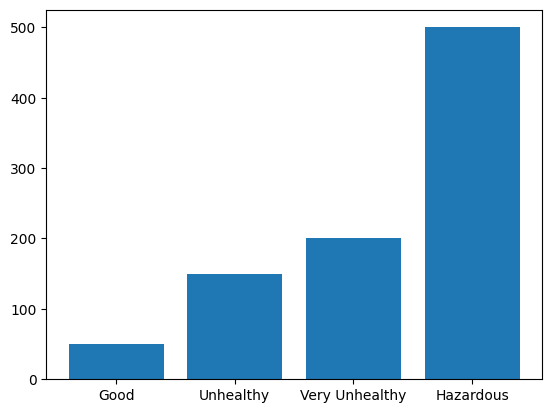

In [26]:
categories=['Good','Unhealthy','Very Unhealthy','Hazardous']
values= [50,150,200,500]
plt.bar(categories,values)
plt.show()